<a href="https://colab.research.google.com/github/2303A52102/AIML_2303A52102/blob/main/AIML_ASS_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbor Classification

Import packages and data set

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/drive/MyDrive/health.csv",sep=',', index_col=0)
df.head()


,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
User ID,,,,,,,,,,,
1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      100 non-null    int64 
 1   Gender                   100 non-null    object
 2   Sleep Quality            100 non-null    int64 
 3   Bedtime                  100 non-null    object
 4   Wake-up Time             100 non-null    object
 5   Daily Steps              100 non-null    int64 
 6   Calories Burned          100 non-null    int64 
 7   Physical Activity Level  100 non-null    object
 8   Dietary Habits           100 non-null    object
 9   Sleep Disorders          100 non-null    object
 10  Medication Usage         100 non-null    object
dtypes: int64(4), object(7)
memory usage: 9.4+ KB


In [3]:
df.describe()

,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.00000
mean,36.010000,7.000000,6830.000000,2421.00000
std,8.454865,1.734964,2498.706736,281.06759
min,22.000000,4.000000,3000.000000,2000.00000
25%,28.750000,5.750000,4750.000000,2175.00000
50%,35.000000,7.500000,6750.000000,2400.00000
75%,44.000000,8.250000,9000.000000,2700.00000
max,50.000000,9.000000,11000.000000,2900.00000


Check the spread of the features


In [4]:
columns = df.columns.tolist()
print(columns)

['Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time', 'Daily Steps', 'Calories Burned', 'Physical Activity Level', 'Dietary Habits', 'Sleep Disorders', 'Medication Usage']


Run a 'for' loop to draw boxlots of all the features for '0' and '1' TARGET CLASS

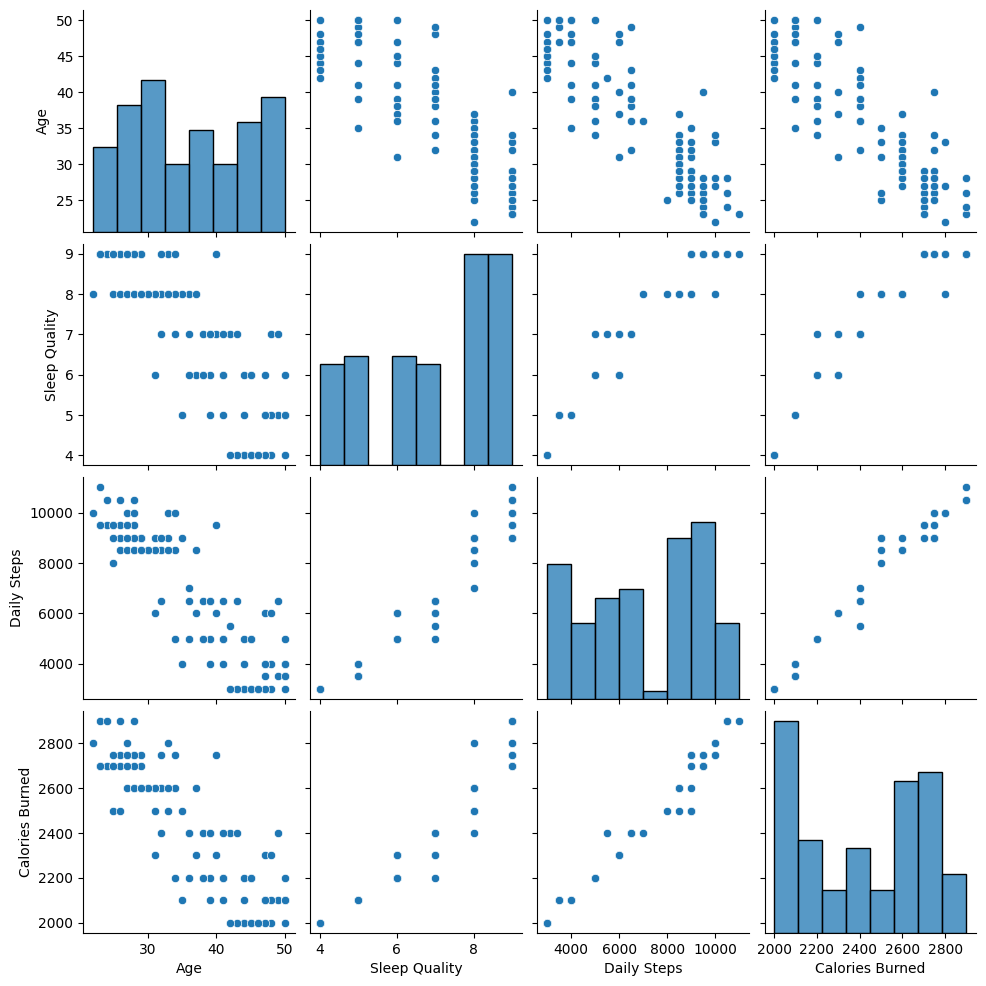

In [5]:
sns.pairplot(df)


Identify the Target Classes from the Dataset and their Counts

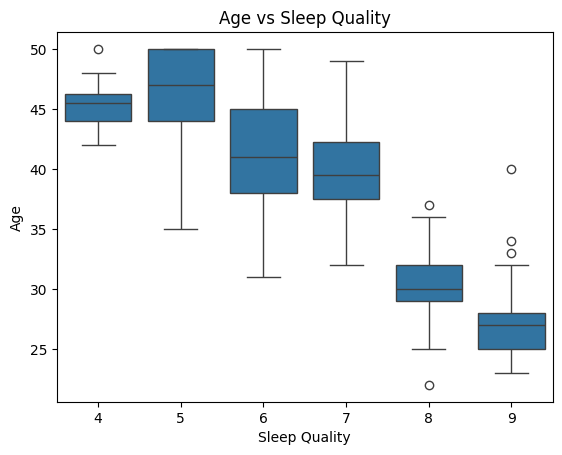

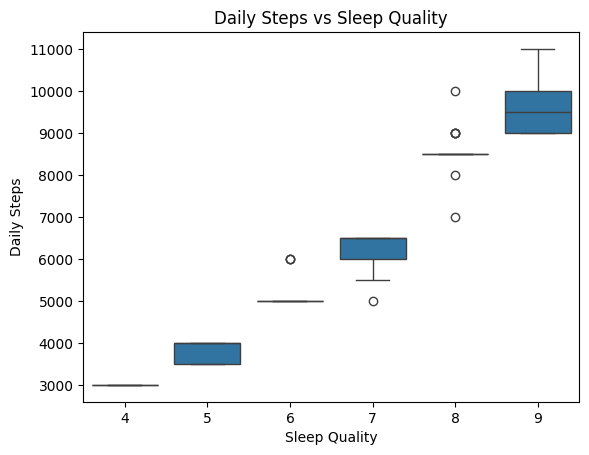

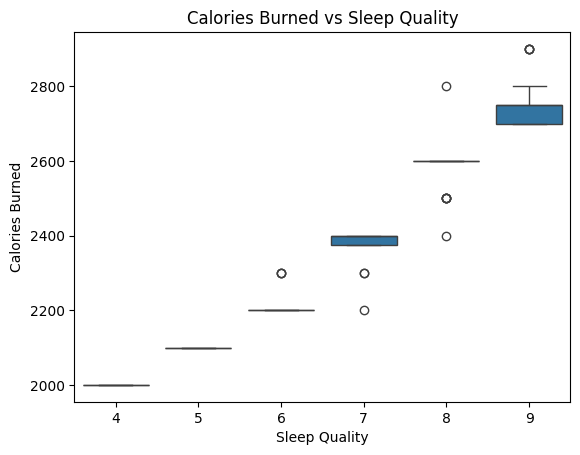

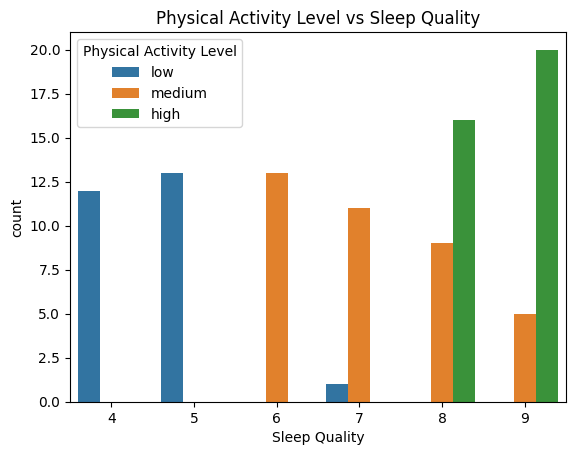

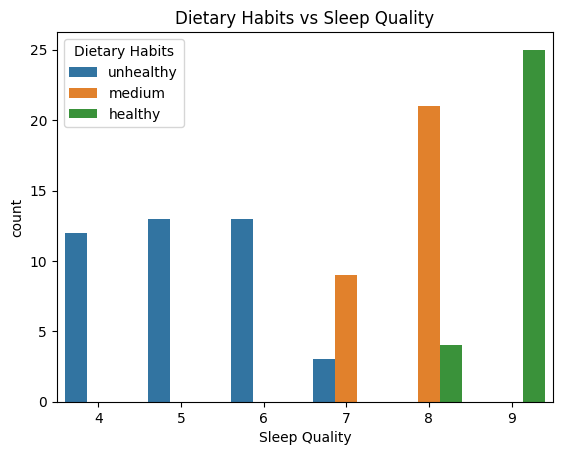

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_plot = ['Age', 'Daily Steps', 'Calories Burned']
categorical_columns = ['Physical Activity Level', 'Dietary Habits']

for column in columns_to_plot:
    plt.figure()
    sns.boxplot(x='Sleep Quality', y=column, data=df)
    plt.title(f'{column} vs Sleep Quality')
    plt.show()

for column in categorical_columns:
    plt.figure()
    sns.countplot(x='Sleep Quality', hue=column, data=df)
    plt.title(f'{column} vs Sleep Quality')
    plt.show()


Scale the features using sklearn.preprocessing package

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Fit the features data only to this estimator

(leaving the TARGET CLASS column) and transform

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a StandardScaler object
scaler = StandardScaler()

# Define the numerical columns to scale
numerical_columns = ['Age', 'Daily Steps', 'Calories Burned']

# Fit the scaler to the numerical data and transform it
scaled_features = scaler.fit_transform(df[numerical_columns])

# Convert the scaled features back into a dataframe
scaled_df = pd.DataFrame(scaled_features, columns=numerical_columns)

# Add the unscaled columns back into the scaled dataframe
for column in df.columns:
    if column not in numerical_columns:
        scaled_df[column] = df[column]

In [9]:
df_feat = df.copy()
df_feat[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df_feat.head()


,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
User ID,,,,,,,,,,,
1,-1.308769,f,8,23:00,06:30,0.470601,0.282487,medium,healthy,no,no
2,-0.238931,m,7,00:30,07:00,-0.736068,-0.790249,low,unhealthy,yes,yes
3,-0.833285,f,9,22:45,06:45,0.872824,0.997645,high,healthy,no,no
4,0.593166,m,5,01:00,06:30,-1.138292,-1.147828,low,unhealthy,yes,no
5,-1.665382,f,8,23:30,07:00,1.275048,1.355223,high,medium,no,no


Train/Test split, model fit and prediction

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Sleep Quality'], test_size=0.30, random_state=101)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [12]:
pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[6 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]


In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.71      1.00      0.83         5
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6

    accuracy                           0.93        30
   macro avg       0.79      0.83      0.81        30
weighted avg       0.89      0.93      0.91        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))


Misclassification error rate: 0.067


Choosing 'k' by elbow method

In [16]:
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error (misclassification) Rate')

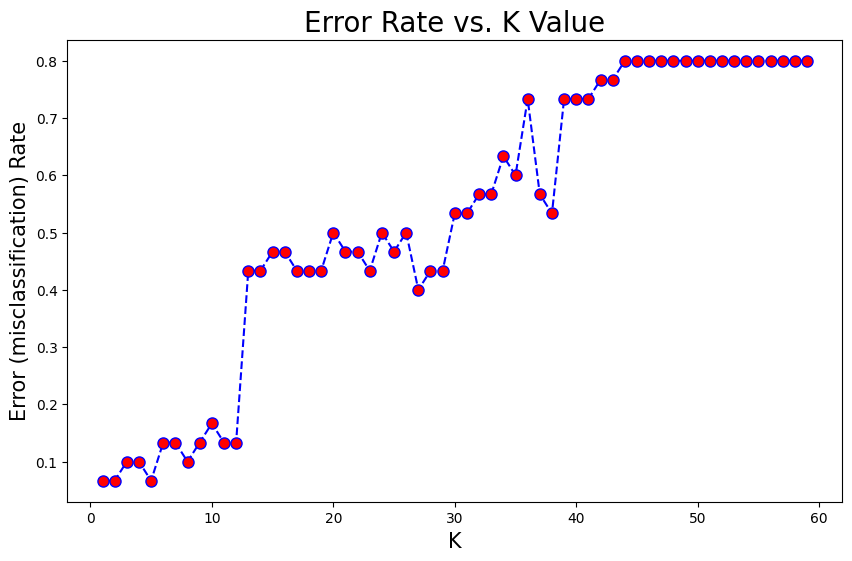

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)
